# <div align = center>CIFAR 10:  مجموعة الصور الملونة المصنفة إلى 10 فئات.

<hr>

#1 - المكتبات (Librairies)

In [ ]:
from keras.datasets import cifar10 as DS
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
import matplotlib.pyplot as plt

# 2 - البيانات  (Data)

## 2.1 - تحميل البيانات

In [ ]:
(x_train, y_train),(x_test, y_test) = DS.load_data()

In [ ]:
print("x_train shape =" , x_train.shape)
print("y_train shape =" , y_train.shape)

print("\nx_test shape =" , x_test.shape)
print("y_test shape =" , y_test.shape)

x_train shape = (50000, 32, 32, 3)
y_train shape = (50000, 1)

x_test shape = (10000, 32, 32, 3)
y_test shape = (10000, 1)


## 2.2 - عرض عينة من البيانات

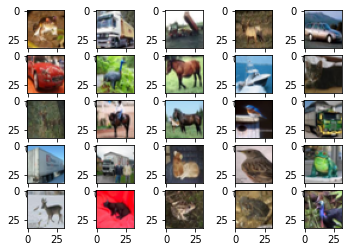

In [ ]:
figure = plt.figure()

for i in range(25):
  figure.add_subplot(5, 5, i+1)
  plt.imshow(x_train[i])

plt.show()

## 2.3 -  تغيير شكل المخرجات

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 3- الشبكة العصبية

## 3.1.1 -  النموذج بدون تجميع

In [ ]:
model = Sequential([
              Conv2D( 32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(32,32,3)),
              Conv2D( 64, (3, 3), padding='valid', activation='relu'),
              Conv2D(128, (3, 3), padding='valid', activation='relu'),
              Conv2D(256, (3, 3), padding='valid', activation='relu'),

              Flatten(),        
                     
              Dense(1025, activation='relu'),              
              Dense(512, activation='relu'),              
              Dense(256, activation='relu'),              
              Dense(128, activation='relu'),               
              Dense(10, activation='softmax')

])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 256)       295168    
                                                                 
 flatten (Flatten)           (None, 147456)            0         
                                                                 
 dense (Dense)               (None, 1025)              151143425 
                                                                 
 dense_1 (Dense)             (None, 512)               5

## 3.1.1 -  النموذج مع تجميع

In [ ]:
model = Sequential([
              Conv2D( 32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(32,32,3)),
              MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'),

              Conv2D( 64, (3, 3), padding='valid', activation='relu'),
              MaxPooling2D(pool_size=(2,2), strides=1, padding='valid'),

              Conv2D(128, (3, 3), padding='valid', activation='relu'),
              MaxPooling2D(pool_size=(2,2), strides=1, padding='valid'),

              Conv2D(256, (3, 3), padding='valid', activation='relu'),
              MaxPooling2D(pool_size=(2,2), strides=1, padding='valid'),

              Flatten(),        
                     
              Dense(1025, activation='relu'),              
              Dense(512, activation='relu'),              
              Dense(256, activation='relu'),              
              Dense(128, activation='relu'),               
              Dense(10, activation='softmax')

])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 10, 10, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 9, 9, 128)       

## 3.2 -  تركيب النموذج 

In [ ]:
model.compile(
    optimizer = Adam(learning_rate=0.001),
    loss = categorical_crossentropy,
    metrics=['accuracy']
)

## 3.3 - تدريب النموذج



In [ ]:
nb_epochs = 7

In [ ]:
history = model.fit(x_train, y_train, batch_size=128, epochs=nb_epochs, verbose=1, validation_split=0.2)

Epoch 1/7
313/313 [==============================] - 16s 37ms/step - loss: 2.7337 - accuracy: 0.2926 - val_loss: 1.6709 - val_accuracy: 0.3824
Epoch 2/7
313/313 [==============================] - 10s 32ms/step - loss: 1.5552 - accuracy: 0.4303 - val_loss: 1.4716 - val_accuracy: 0.4575
Epoch 3/7
313/313 [==============================] - 10s 32ms/step - loss: 1.4155 - accuracy: 0.4873 - val_loss: 1.4383 - val_accuracy: 0.4802
Epoch 4/7
313/313 [==============================] - 10s 32ms/step - loss: 1.3145 - accuracy: 0.5249 - val_loss: 1.2948 - val_accuracy: 0.5335
Epoch 5/7
313/313 [==============================] - 10s 32ms/step - loss: 1.2519 - accuracy: 0.5515 - val_loss: 1.2407 - val_accuracy: 0.5618
Epoch 6/7
313/313 [==============================] - 10s 32ms/step - loss: 1.1756 - accuracy: 0.5784 - val_loss: 1.2231 - val_accuracy: 0.5724
Epoch 7/7
313/313 [==============================] - 10s 32ms/step - loss: 1.1155 - accuracy: 0.6018 - val_loss: 1.1910 - val_accuracy: 0.5822

## 3.4 -  التقييم


In [ ]:
loss, acc = model.evaluate(x_test, y_test, verbose=1)
print("Accuracy = %0.2f" % (acc*100), "%")

313/313 [==============================] - 3s 10ms/step - loss: 1.2081 - accuracy: 0.5737
Accuracy = 57.37 %


## 3.5 -  الرسوم البيانية للتعلم


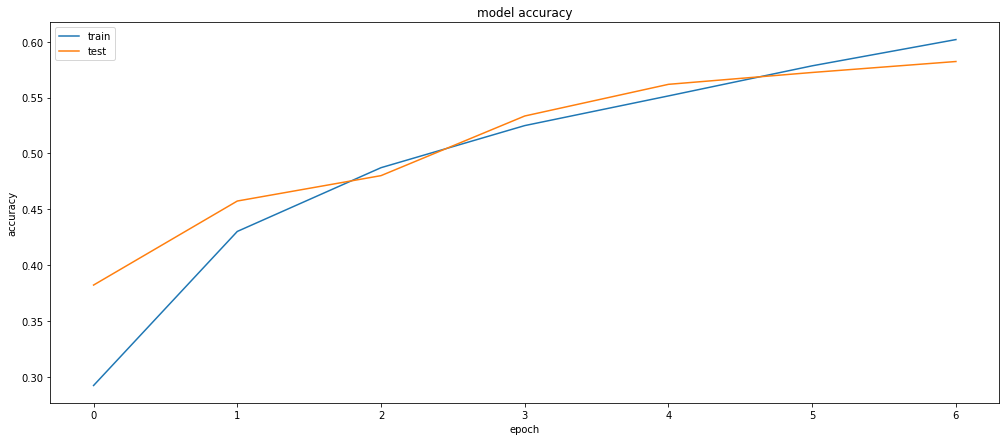

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left') 
plt.rcParams["figure.figsize"] = (17,7)
plt.show()

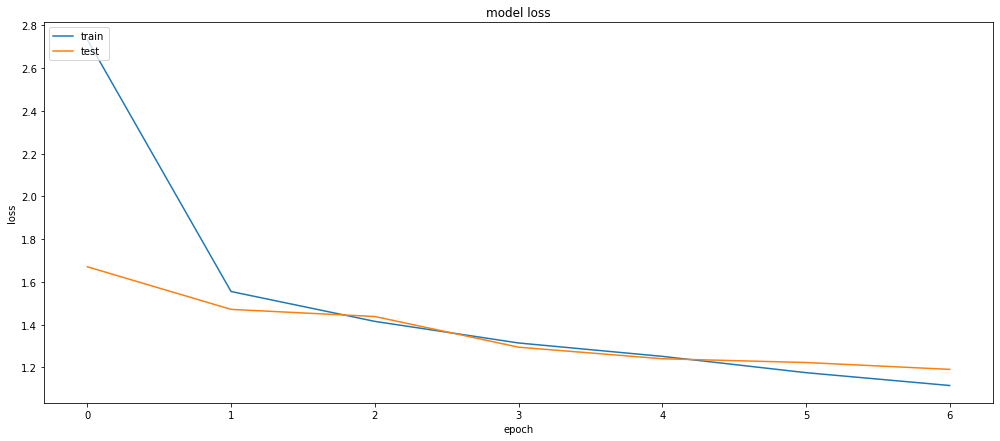

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left') 
plt.rcParams["figure.figsize"] = (17,7)
plt.show()